<a href="https://colab.research.google.com/github/MartinaPassaggi/BasicsOfPythonCourse/blob/main/BoP_session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | October 2024
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [97]:
# I import all the things I need and upload the file:

import pandas as pd
import numpy as np

from google.colab import files

uploaded = files.upload()

Saving data.csv to data (4).csv


# 2.&nbsp;Data Cleaning (overview)

In [98]:
# I want to have a general understanding of the variables, so I use these commands:

data = pd.read_csv('data.csv')
print(data.shape)
print("==============")
print(data.head())
print("==============")
print(data.tail())
print("==============")

# I decide to keep it simple: I want to know if there is a correlation between
# the tempo of a song, and its valence. Basically, my hypothesis is that the
# faster the tempo of a song is, the happier it sounds, and the lower the tempo,
# the sadder.

(2017, 17)
   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Fu

# 3.&nbsp;Data Cleaning (interpretability)

In [99]:
# The valence is measured form 0 to 0.1, so I just round it a bit:

data["valence"] = np.round(data["valence"],2)


# The tempo is measured in BPM, so I don't want to have decimals:

data["tempo"] = np.round(data["tempo"], decimals=0)
print(data)



      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness  tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.0   
1             0.0

# 4.&nbsp;Data Cleaning (reduction)

In [106]:
data.drop(data.columns[[2,3]], axis=1, inplace=True)
print(data)

#I remove most columns a couple at a time, until only the ones I want are left

      tempo  valence
0     150.0     0.29
1     160.0     0.59
2      75.0     0.17
3      86.0     0.23
4     174.0     0.90
...     ...      ...
2012   75.0     0.21
2013  110.0     0.87
2014  150.0     0.47
2015  150.0     0.62
2016  190.0     0.40

[2017 rows x 2 columns]


# 5.&nbsp;Data Cleaning (noisy data)

In [107]:
data.sort_values("tempo", axis = 0, ascending = False)
# There don't seem to be any weird values, and checking with Google,
# the tempo seems to be accurate.


,tempo,valence
412,219.0,0.71
124,210.0,0.75
718,208.0,0.17
1960,204.0,0.55
1711,202.0,0.77
...,...,...
1562,62.0,0.17
1544,60.0,0.10
1406,60.0,0.34
1532,59.0,0.20


In [108]:
data.sort_values("valence", axis = 0, ascending = False)
# The same goes here, the valence is always between range and there are no weird values

,tempo,valence
460,125.0,0.99
912,111.0,0.98
497,100.0,0.97
337,128.0,0.97
1966,140.0,0.97
...,...,...
488,128.0,0.04
1876,68.0,0.04
734,127.0,0.04
811,100.0,0.04


# 6.&nbsp;Data Cleaning (completeness)

In [109]:
data.info()
print(data.isnull().sum())
# There are no null values, so we can continue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tempo    2017 non-null   float64
 1   valence  2017 non-null   float64
dtypes: float64(2)
memory usage: 31.6 KB
tempo      0
valence    0
dtype: int64


# 7.&nbsp;Data Exploring


In [110]:
# I'm interested to know what tempo these songs are:

data_lento = data[(data["tempo"] > 50) & (data["tempo"] <= 100)]
print(data_lento)

      tempo  valence
2      75.0     0.17
3      86.0     0.23
5      85.0     0.26
6      80.0     0.31
9     100.0     0.39
...     ...      ...
1989   96.0     0.70
1994  100.0     0.71
1995  100.0     0.13
2008   98.0     0.59
2012   75.0     0.21

[512 rows x 2 columns]


In [111]:
data_moderato = data[(data["tempo"] > 100) & (data["tempo"] <= 150)]
print(data_moderato)

      tempo  valence
0     150.0     0.29
7     144.0     0.39
8     130.0     0.40
10    112.0     0.52
11    104.0     0.64
...     ...      ...
2010  102.0     0.44
2011  128.0     0.33
2013  110.0     0.87
2014  150.0     0.47
2015  150.0     0.62

[1241 rows x 2 columns]


In [112]:
data_veloce = data[(data["tempo"] > 150)]
print(data_veloce)

# It seems like most of these songs are between 100 and 150 BPM,
# which refers to tempo "allegro" or "vivace".

      tempo  valence
1     160.0     0.59
4     174.0     0.90
44    166.0     0.62
82    154.0     0.92
83    176.0     0.46
...     ...      ...
1997  160.0     0.55
2000  170.0     0.36
2003  160.0     0.31
2006  155.0     0.31
2016  190.0     0.40

[263 rows x 2 columns]


In [113]:
# song with the highest tempo = song 412, "Walking into sunshine" by Central Land
# song with the lowest tempo = "Gramercy Sunset", by The Hot Sardines

# So far it kinda looks like valence is hgiher with faster tempo :)


data.sort_values("tempo", axis = 0, ascending = False)

,tempo,valence
412,219.0,0.71
124,210.0,0.75
718,208.0,0.17
1960,204.0,0.55
1711,202.0,0.77
...,...,...
1562,62.0,0.17
1544,60.0,0.10
1406,60.0,0.34
1532,59.0,0.20


In [114]:
# song with the highest valence = "Osaka Loop Line", by Discovery
# song with the lowest valence = "Save You", by Wahlstdet

# But now my hypothesis is not looking so sound anymore :(

data.sort_values("valence", axis = 0, ascending = False)

,tempo,valence
460,125.0,0.99
912,111.0,0.98
497,100.0,0.97
337,128.0,0.97
1966,140.0,0.97
...,...,...
488,128.0,0.04
1876,68.0,0.04
734,127.0,0.04
811,100.0,0.04


# 8.&nbsp;Data Analysis

In [115]:
data.corr()

# The values are not correlated at all, so my hypothesis is null :(

,tempo,valence
tempo,1.000000,-0.015268
valence,-0.015268,1.000000


# 9.&nbsp;Data Visualization

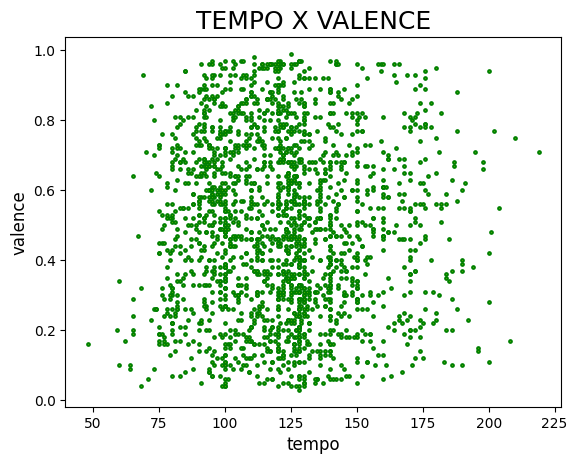

In [116]:
# I will plot my shame in green...

import matplotlib.pyplot as plt

x = data["tempo"]
y = data["valence"]

plt.scatter(x, y,
            c ="yellow",
            linewidths = 2,
            edgecolor ="green",
            s = 2)

plt.xlabel("tempo",fontsize=12)
plt.ylabel("valence",fontsize=12)
plt.title("TEMPO X VALENCE",fontsize=18)
plt.show()

# 10.&nbsp;Data Exporting

In [117]:
# ... and export it to a csv file

data.to_csv('TEMPO_X_VALENCE.csv', header=True, index=True)

files.download('TEMPO_X_VALENCE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>